## US Accidents Exploratory Data Analysis

In [1]:
#Import libraries
import pandas as pd
import numpy as np

import os
working_directory = os.getcwd()
print(working_directory)


/Users/mossia


In [2]:
#Read in the data
path = working_directory + '/Downloads/US_accidents.csv'
df = pd.read_csv(path)

### Getting info about the dataset

In [3]:
#Check columns
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
#Get some info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
#Take a look at the data
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
#Summary statistics
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [7]:
#Columns with numerical values
print(df.count(numeric_only=True))
print("Numerical Columns:", len(df.count(numeric_only=True)))


Severity             2845342
Start_Lat            2845342
Start_Lng            2845342
End_Lat              2845342
End_Lng              2845342
Distance(mi)         2845342
Number               1101431
Temperature(F)       2776068
Wind_Chill(F)        2375699
Humidity(%)          2772250
Pressure(in)         2786142
Visibility(mi)       2774796
Wind_Speed(mph)      2687398
Precipitation(in)    2295884
Amenity              2845342
Bump                 2845342
Crossing             2845342
Give_Way             2845342
Junction             2845342
No_Exit              2845342
Railway              2845342
Roundabout           2845342
Station              2845342
Stop                 2845342
Traffic_Calming      2845342
Traffic_Signal       2845342
Turning_Loop         2845342
dtype: int64
Numerical Columns: 27


In [8]:
#Check number of missing values per column and sort in descending order
df.isna().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [9]:
#Percentage of missing values
missing_values = df.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(df)*100
print(" Percentage of Missing Values \n", missing_percentage)

 Percentage of Missing Values 
 Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64


<AxesSubplot:>

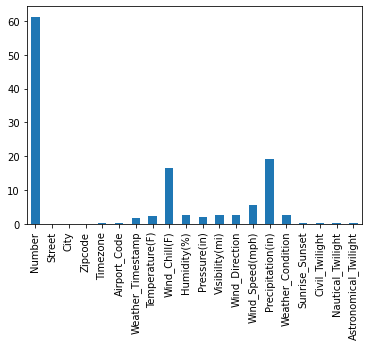

In [10]:
#Plot of percentage of missing values
percentage_of_missing_values=df.isna().sum()/len(df)*100
percentage_of_missing_values[percentage_of_missing_values!=0].plot(kind="bar")

In [11]:
#Columns with null values
null_columns = [i for i in df.columns if df[i].isnull().any()]
print(null_columns)

['Number', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


### Cleaning the data

In [12]:
#Drop columns with high numbers of missing values
df.drop(["Number"],axis=1,inplace=True)
df.drop(["Precipitation(in)"],axis=1,inplace=True)
df.drop(["Wind_Chill(F)"],axis=1,inplace=True)
df.drop(["Wind_Speed(mph)"],axis=1,inplace=True) 
df.drop(["Airport_Code"],axis=1,inplace=True) 
df.drop(["Timezone"],axis=1,inplace=True)
df.drop(["Pressure(in)"],axis=1,inplace=True)
df.drop(["Nautical_Twilight"],axis=1,inplace=True)
df.drop(["Civil_Twilight"],axis=1,inplace=True)
df.drop(["Sunrise_Sunset"],axis=1,inplace=True)
df.drop(["Astronomical_Twilight"],axis=1,inplace=True) 

In [13]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,False,False,False,False
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,False,False,False,False
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,True,False,False,False,False,False,False,False,False
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,False,False,False,False
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#Impute missing values 
df["Temperature(F)"]=df["Temperature(F)"].fillna(df["Temperature(F)"].median())
df["Humidity(%)"]=df["Humidity(%)"].fillna(df["Humidity(%)"].median())
df["Visibility(mi)"]=df["Visibility(mi)"].fillna(df["Visibility(mi)"].median())

In [15]:
#Impute missing values
df["Weather_Condition"]=df["Weather_Condition"].fillna(df["Weather_Condition"].mode()[0])

In [16]:
#Remove missing rows for the column City
df.dropna(subset=["City"],inplace=True)

### EDA

In [17]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

#### Location based analysis of accidents

In [18]:
#Exploring the Start Lat column
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845205, dtype: float64

In [19]:
#Exploring the Start Lng column
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845205, dtype: float64

In [20]:
#Install libraries
!pip install folium

In [21]:
#Import libraries
import folium
from folium import plugins
from folium.plugins import HeatMap

In [22]:
#Create latitude and longitute pairs
list(zip(list(df.Start_Lat),list(df.Start_Lng)))

[(40.10891, -83.09286),
 (39.86542, -84.0628),
 (39.10266, -84.52468),
 (41.06213, -81.53784),
 (39.172393, -84.49279200000002),
 (39.06324, -84.03243),
 (39.77565, -84.18603),
 (41.37531, -81.82016999999998),
 (40.702247, -84.075887),
 (40.10931, -82.96849),
 (39.19288, -84.47723),
 (39.13877, -84.53394),
 (41.4739, -81.704233),
 (39.582242, -83.677814),
 (40.151785, -81.312635),
 (40.151747, -81.312682),
 (39.97241, -82.84695),
 (39.9838, -82.85656999999998),
 (40.02664, -82.9944),
 (41.679361, -83.573037),
 (40.99613, -85.26613),
 (39.0381, -84.59243000000002),
 (40.03386, -82.99601),
 (39.85798, -84.28181),
 (39.15267, -84.5395),
 (39.30732, -85.95982),
 (39.77572, -84.04815),
 (39.97643, -83.12306),
 (39.58595, -85.82518),
 (39.3638, -85.51659000000002),
 (39.45132, -85.62516),
 (39.75067, -84.14148),
 (39.2675, -81.49929),
 (39.86025, -85.96623000000002),
 (41.95677, -83.67214),
 (38.27401, -85.74844),
 (41.95677, -83.67214),
 (40.52225, -80.06666),
 (40.487814, -80.009439),
 (40

In [23]:
#Get a sample of latitude and longitude pairs
sample_df = df.sample(int(0.001 * len(df)))
lat_lon = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [24]:
#Plot a heatmap using the sample
map = folium.Map()
HeatMap(lat_lon).add_to(map)
map

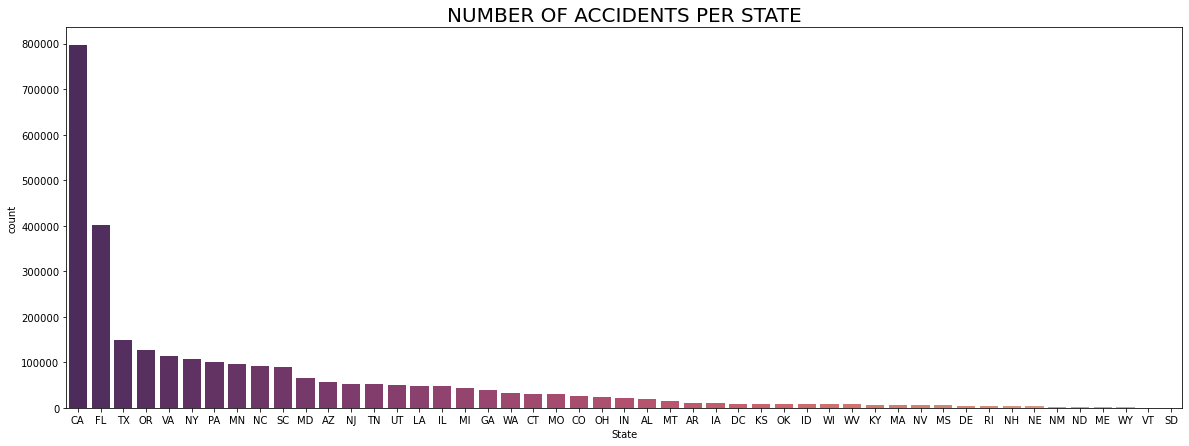

In [25]:
#Plot of accidents per state
fig, ax = plt.subplots(figsize = (20,7))
s = sns.countplot(x="State", data=df, orient = 'v', palette = "flare_r", order = df['State'].value_counts().index)
s.set_title("NUMBER OF ACCIDENTS PER STATE", fontsize=20);

In [26]:
#Exploring the City column
cities = df.City.unique()
len(cities)

11681

In [27]:
#Number of accidents per cities
cities_accidents = df.City.value_counts()
cities_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

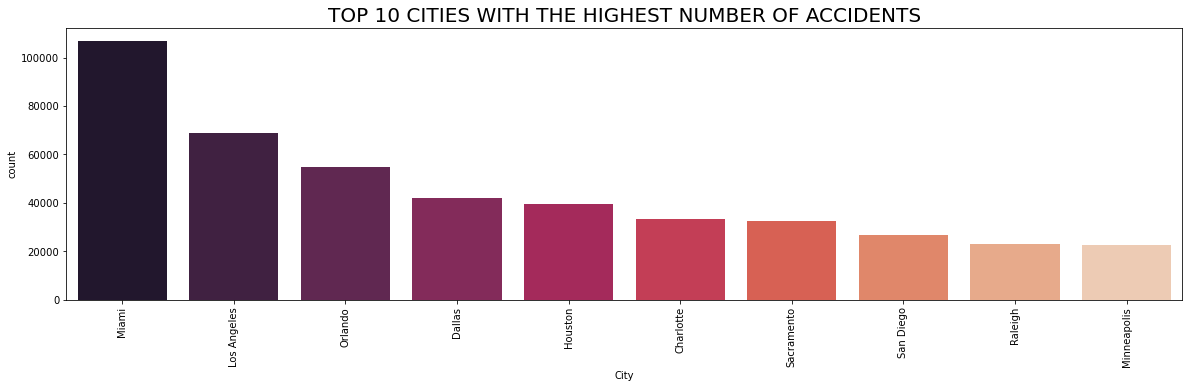

In [28]:
#Plot the 10 cities with highest no of accidents
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=df, order=df.City.value_counts().iloc[:10].index, orient = 'v', palette = "rocket")
c.set_title("TOP 10 CITIES WITH THE HIGHEST NUMBER OF ACCIDENTS", fontsize=20)
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

In [29]:
#Categorize cities by high accident cities and low accident cities
high_accident_cities = cities_accidents[cities_accidents >= 1000]
low_accident_cities = cities_accidents[cities_accidents < 1000]

In [30]:
#Proportion of cities with high number of accidents
len(high_accident_cities)/len(cities)

0.04246211796935194

In [31]:
#Proportion of cities with high number of accidents
len(low_accident_cities)/len(cities)

0.957537882030648

#### Time based analysis of accidents

In [32]:
#Exploring the Start Time column
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845205, dtype: object

In [33]:
#Convert to date time
df.Start_Time = pd.to_datetime(df.Start_Time)

In [34]:
#Get accidents start time hours
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845205, dtype: int64

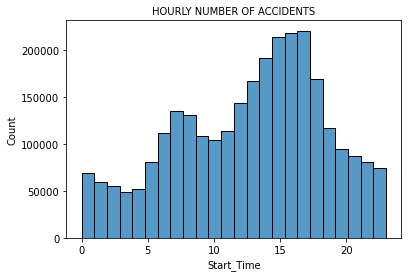

In [35]:
#Plot accidents start time hours
ht = sns.histplot(df.Start_Time.dt.hour, bins=24)
ht.set_title("HOURLY NUMBER OF ACCIDENTS", fontsize=10)
plt.show()

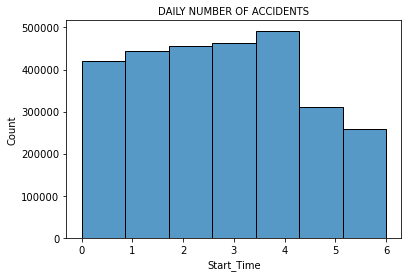

In [36]:
#Plot accidents days
dt = sns.histplot(df.Start_Time.dt.dayofweek, bins=7)
dt.set_title("DAILY NUMBER OF ACCIDENTS", fontsize=10)
plt.show()

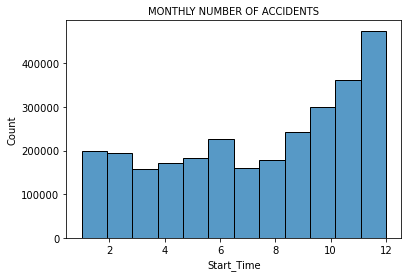

In [37]:
#Plot accidents months
mt = sns.histplot(df.Start_Time.dt.month, bins=12)
mt.set_title("MONTHLY NUMBER OF ACCIDENTS", fontsize=10)
plt.show()

#### Weather based analysis of accidents 

In [38]:
#Exploring the Temperature column
df["Temperature(F)"].value_counts()

 64.0     127207
 73.0      64502
 77.0      63570
 75.0      60533
 72.0      59673
           ...  
 109.8         1
-9.8           1
 170.6         1
 107.2         1
 99.1          1
Name: Temperature(F), Length: 788, dtype: int64

In [39]:
#Install libraries
!pip install plotly.express

In [40]:
#Import libraries
import plotly.express as px

In [41]:
weather_dist = df['Temperature(F)'].value_counts().reset_index()
weather_dist.columns=["temp_range","accidents"]
weather_dist

,temp_range,accidents
0,64.0,127207
1,73.0,64502
2,77.0,63570
3,75.0,60533
4,72.0,59673
...,...,...
783,109.8,1
784,-9.8,1
785,170.6,1
786,107.2,1


In [42]:
#Define temperature ranges
weather_dist.temp_range=weather_dist.temp_range.map({1.0:"below 10 degree F",
                            2.0:"from 10 to 50 degree F",
                            3.0:"from 50 to 90 degree F",
                            4.0:"from 90 to 130 degree F",
                             5.0:"above 130 degree F"})

In [64]:
px.bar(x=weather_dist["temp_range"],y=weather_dist["accidents"])

In [43]:
#Getting weather related columns
weather = df.iloc[:, 17:26]
weather['Severity'] = df['Severity']
weather.head()

,Weather_Timestamp,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Severity
0,2016-02-08 00:53:00,42.1,58.0,10.0,SW,Light Rain,False,False,False,3
1,2016-02-08 05:58:00,36.9,91.0,10.0,Calm,Light Rain,False,False,False,2
2,2016-02-08 05:53:00,36.0,97.0,10.0,Calm,Overcast,False,False,False,2
3,2016-02-08 06:54:00,39.0,55.0,10.0,Calm,Overcast,False,False,False,2
4,2016-02-08 07:53:00,37.0,93.0,10.0,WSW,Light Rain,False,False,False,3


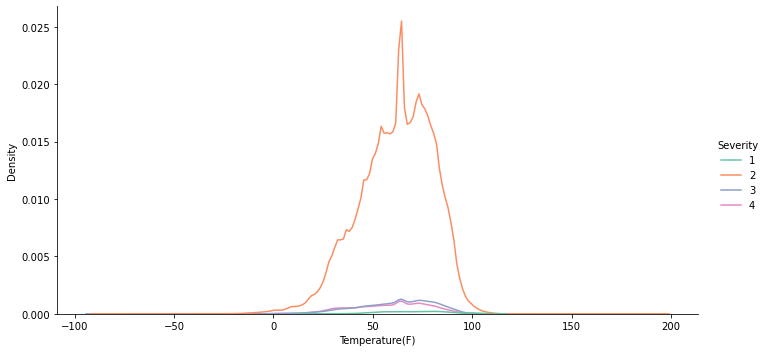

In [44]:
#Plot of severity of accidents depending on temperature
sns.displot(weather, x="Temperature(F)", hue="Severity",kind='kde', palette="Set2", height=5, aspect=2);

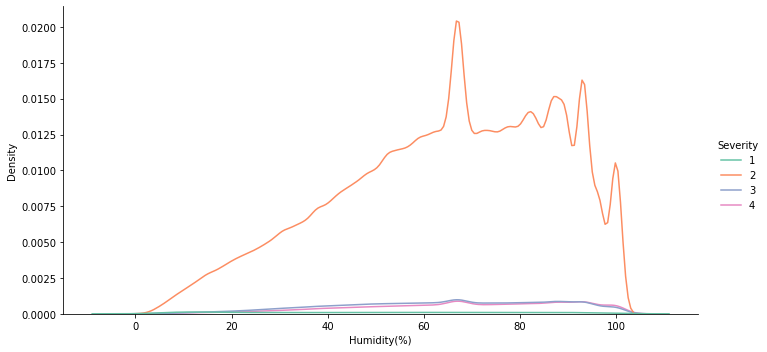

In [45]:
#Plot of severity of accidents depending on humidity
sns.displot(weather, x="Humidity(%)", hue="Severity",kind='kde', palette="Set2", height=5, aspect=2);

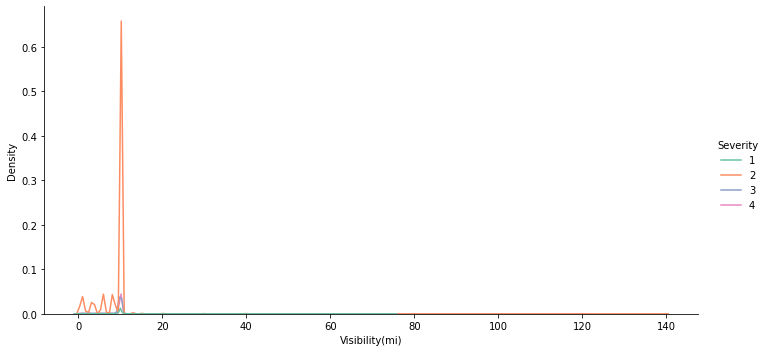

In [46]:
#Plot of severity of accidents depending on visibility
sns.displot(weather, x="Visibility(mi)", hue="Severity",kind='kde', palette="Set2", height=5, aspect=2);